# 타이타닉 데이터 EDA

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

### 타이타닉 탑승자 데이터 불러오기

In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로딩 및 확인
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


##결측치 처리##

age        1046 non-null   float64 -> std가 14.41로 작아서 평균으로 대체하고자 함

cabin      295 non-null    object ->이 데이터로 부터 추출할 정보가 없다고 판단 삭제!

boat       486 non-null    object-> 이 데이터로 부터 추출할 정보가 없다고 판단 삭제!

body       121 non-null    float64 -> 이 데이터로 부터 추출할 정보가 없다고 판단 삭제!

home.dest  745 non-null    object -> 이 데이터로 부터 추출할 정보가 없다고 판단 삭제!

In [4]:
# 결측치를 채워주기 위해 기초통계량 확인 -> 'age' 는 std가 작으므로 mean으로 채워 주기로 함
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df.loc[df['age'] != df['age'], 'age'] = df['age'].mean()

In [6]:
df.describe() #age 의 결측치가 채워진 것을 확인

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,12.883193,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,29.881138,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
df = df.drop(['cabin','boat','body','home.dest'], axis='columns')
df.head(3) #해당 칼럼이 없어진 것 확인

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S


### 시각화로 데이터 대략적으로 살펴보기

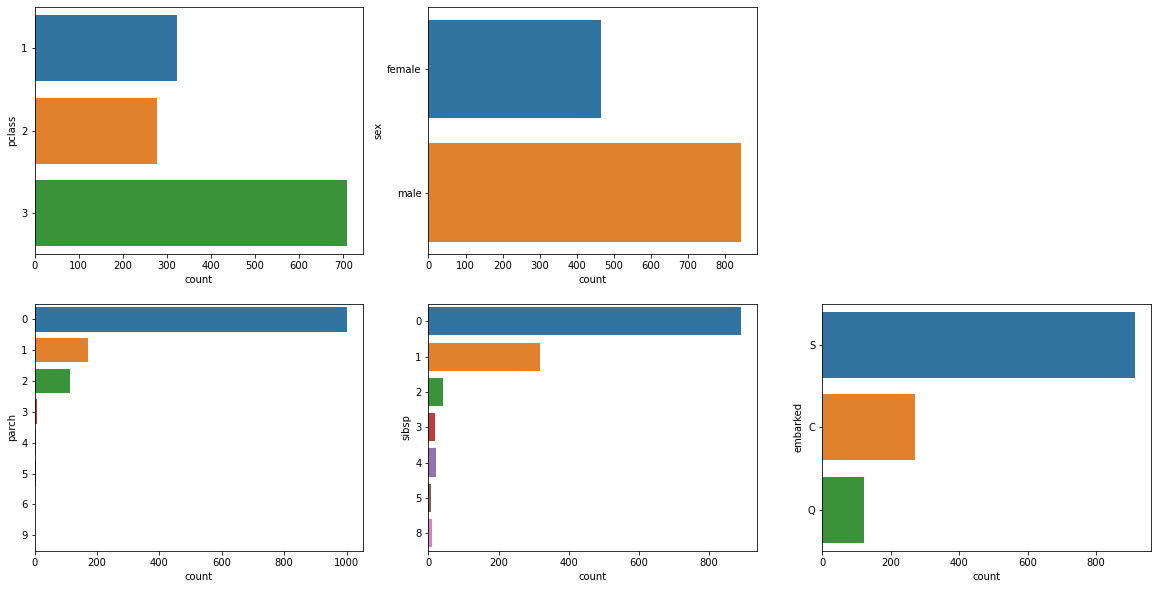

In [8]:
#생존여부를 알기 위해 어떤 부분을 살펴 보아야 하는 지 알아보기 위해 간단한 시각화 진행
#pclass, sex,sibsp,parch,embarked 데이터를 가지고 subplot을 만들어 봄

pp = plt.figure(figsize=(20,10))

px = pp.add_subplot(2,3,1)
sns.countplot(y= 'pclass',data=df) #3등급의 수가 월등히 많음
px2 = pp.add_subplot(2,3,2)
sns.countplot(y= 'sex',data=df) #남성의 수가 더 많음
px4 = pp.add_subplot(2,3,4)
sns.countplot(y= 'parch',data=df)#자녀가 없는 경우가 더 많음
px5 = pp.add_subplot(2,3,5)
sns.countplot(y= 'sibsp',data=df)#혼자탄 경우가 더 많음
px6 = pp.add_subplot(2,3,6)
sns.countplot(y= 'embarked',data=df)#s의 수가 많음

plt.show()

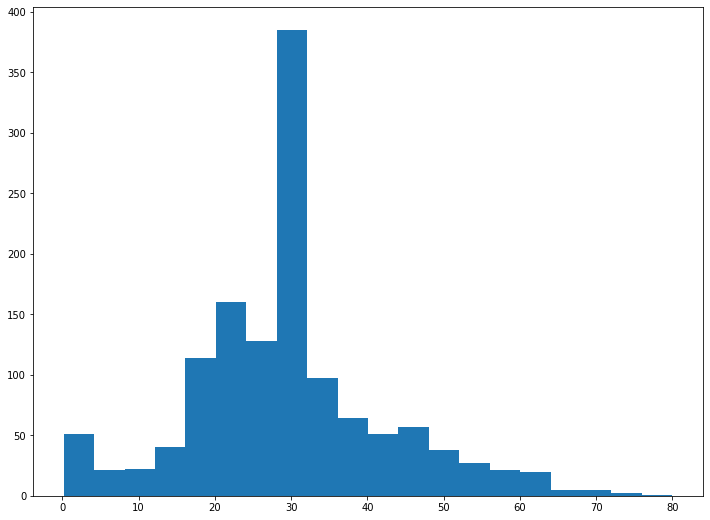

In [9]:
#age 데이터 -> 0 ~80까지 분포해 있음
df['age'].hist(bins=20,figsize=(12,9),grid=False);

## 가설 세우기 ##

- pclass 가 높을 수록 더 많이 생존 했을까?

 ->1등급 3등급 2등급 순으로 많이 생존 함
 
 ->등급별 총 탑승자 대비 생존자 수 비율 알아보기
 
      1등급: 0.61

      2등급: 0.42

      3등급: 0.25

In [10]:
#등급 별 생존자 수
s_p = df.query("survived == 1").groupby('pclass')['survived'].count()
s_p

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

In [11]:
#등급별 탑승 인원
p_count = df.groupby('pclass')['pclass'].count()
p_count

pclass
1    323
2    277
3    709
Name: pclass, dtype: int64

In [12]:
#클라스 별 생존자 비율 -> 3등급 탑승자가 월등히 많았으나 생존 비율로 따지면 가장 낮다.
for i in range(1,4):
  s_p_ratio = s_p[i]/p_count[i]
  print(s_p_ratio)

0.6191950464396285
0.4296028880866426
0.2552891396332863


- 성별과 생존율도 상관 있을까?

  -> 여성이 훨씬 많이 생존함
  
  -> 성별 탑승자 대비 생존율
  
      female:0.40
      male:0.19

In [13]:
#성별 생존자 수
s_s = df.query("survived == 1").groupby('sex')['survived'].count()
s_s

sex
female    339
male      161
Name: survived, dtype: int64

In [14]:
#성별 탑승자 수
s_count = df.groupby('sex')['sex'].count()
s_count

sex
female    466
male      843
Name: sex, dtype: int64

In [15]:
#성별 생존자 비율
for i in s_s:
  for j in s_count:
    s_s_ratio = i/j
  print(s_s_ratio)

0.40213523131672596
0.19098457888493475


- 노약자, 중장년, 어린이 별로 다른 생존율을 보일까?
   
   0~19 사이의 연령층 생존 비율:0.45
   
   20~39 사이의 연령층 생존 비율:0.35
   
   40~80 사이의 연령층 생존 비율:0.39

   -> 노약자와 어린이를 먼저 대피 시킨 것으로 유추

In [16]:
age = pd.cut(df['age'],[0,20,40,80])
df.pivot_table('survived',[age])

,survived
age,
"(0, 20]",0.459677
"(20, 40]",0.354916
"(40, 80]",0.396476


- 동승자가 있는 경우에 생존율이 더 높을 까?

  가족 수는 3명인 승객이 가장 생존율이 높으며 혼자인 경우는 생존율이 낮다.

In [32]:
#parch 와 sibsp 더해 동승자를 표시하고 0인 승객은 혼자 탄 승객으로 표시

df['family_size']=0
df['family_size']=df['parch']+df['sibsp']
df['alone']=0
df.loc[df.family_size==0,'alone']=1
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family_size,alone
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,3,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,3,0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/

<Figure size 720x720 with 0 Axes>

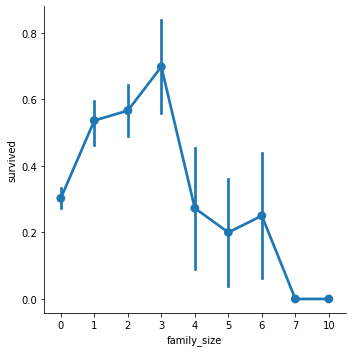

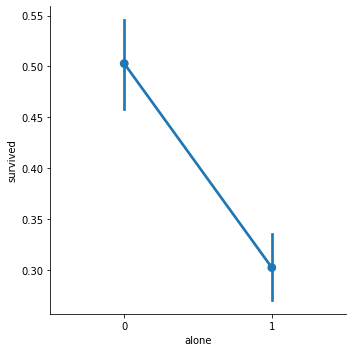

In [40]:
plt.figure(figsize=(10,10))
sns.factorplot('family_size','survived',data=df)
sns.factorplot('alone','survived',data=df)
plt.show()

##총분석##

 나이가 어리고(0~19세) 여자이고 1등급일 때 
 생존율이 가장 높다.

 반대로 3등급은 성별과 나이를 막론하고 50%를 
 넘지 않으며, 이 마저도 나이가 어리고 여자인 
 순으로 올림차순 된 수치를 보인다.

 생존율에 나이와 성별 그리고 객실 등급이 매우 중요한 영향을 미쳤다고 볼 수 있다.


In [44]:
#나이, 성별, pclass 별 생존 분석
age = pd.cut(df['age'],[0,20,40,80])
df.pivot_table('survived',['sex',age],'pclass')

pclass                  1         2         3
sex    age                                   
female (0, 20]   0.937500  0.962963  0.515152
       (20, 40]  0.974359  0.873016  0.492754
       (40, 80]  0.960000  0.812500  0.333333
male   (0, 20]   0.600000  0.464286  0.198020
       (20, 40]  0.377778  0.091743  0.148876
       (40, 80]  0.265823  0.058824  0.055556